In [84]:
import pandas as pd
import numpy as np
from scipy.stats import anderson

In [85]:
df = pd.read_csv('../data/processed/meteorological/HR.csv')
print(df.shape)
df.head(2)

(35064, 13)


,FECHA,HORA,PARAM,AGU,ATM,CEN,LDO,LPIN,MIR,OBL,SFE,TLA,VAL
0,2016-01-01,00:00,HR,71.5,70.3,73.4,71.0,79.8,75.1,74.2,NaN,68.3,70.1
1,2016-01-01,01:00,HR,73.6,74.2,75.7,75.4,84.0,77.8,76.4,NaN,71.6,71.9


In [76]:
df_stack = df.drop(columns='PARAM').set_index(['FECHA','HORA']).stack()
data = df_stack.reset_index()[0].dropna().values
idx = data<=100
data = data[idx]
data = np.random.choice(data, 1000, replace=False)

In [77]:
result = anderson(data)
p = 0

In [78]:
result

AndersonResult(statistic=6.315034187814945, critical_values=array([0.574, 0.653, 0.784, 0.914, 1.088]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [79]:
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

15.000: 0.574, data does not look normal (reject H0)
10.000: 0.653, data does not look normal (reject H0)
5.000: 0.784, data does not look normal (reject H0)
2.500: 0.914, data does not look normal (reject H0)
1.000: 1.088, data does not look normal (reject H0)


(array([ 25.,  79., 114., 144., 133., 114., 117., 112., 112.,  50.]),
 array([ 0.2 , 10.11, 20.02, 29.93, 39.84, 49.75, 59.66, 69.57, 79.48,
        89.39, 99.3 ]),
 <BarContainer object of 10 artists>)

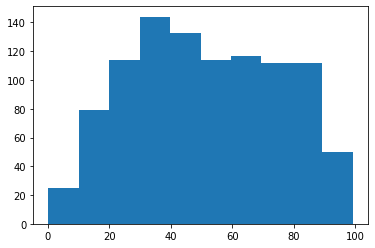

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.hist(data)

<AxesSubplot:ylabel='Density'>

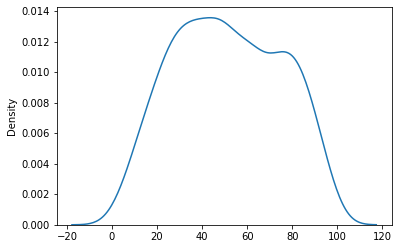

In [81]:
sns.kdeplot(data)

In [82]:
from scipy.stats import shapiro

# normality test
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.975, p=0.000
Sample does not look Gaussian (reject H0)


In [99]:
df = pd.read_csv('../data/processed/meteorological/HR.csv')
print(df.shape)
df.head(2)

(35064, 13)


,FECHA,HORA,PARAM,AGU,ATM,CEN,LDO,LPIN,MIR,OBL,SFE,TLA,VAL
0,2016-01-01,00:00,HR,71.5,70.3,73.4,71.0,79.8,75.1,74.2,NaN,68.3,70.1
1,2016-01-01,01:00,HR,73.6,74.2,75.7,75.4,84.0,77.8,76.4,NaN,71.6,71.9


In [100]:
#df_stack = df.drop(columns='PARAM').set_index(['FECHA','HORA']).stack()
data = df[['CEN']].values
idx = data<=100
data = data[idx]
data = np.random.choice(data, 1000, replace=False)

In [101]:
result = anderson(data)
p = 0

In [102]:
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

15.000: 0.574, data does not look normal (reject H0)
10.000: 0.653, data does not look normal (reject H0)
5.000: 0.784, data does not look normal (reject H0)
2.500: 0.914, data does not look normal (reject H0)
1.000: 1.088, data does not look normal (reject H0)


(array([ 29.,  75., 108., 163., 154., 145., 123.,  93.,  82.,  28.]),
 array([  7.2 ,  16.48,  25.76,  35.04,  44.32,  53.6 ,  62.88,  72.16,
         81.44,  90.72, 100.  ]),
 <BarContainer object of 10 artists>)

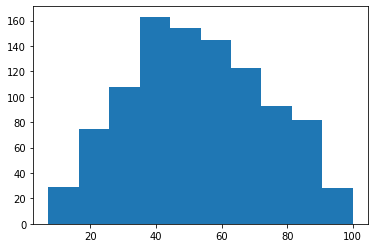

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.hist(data)

<AxesSubplot:ylabel='Density'>

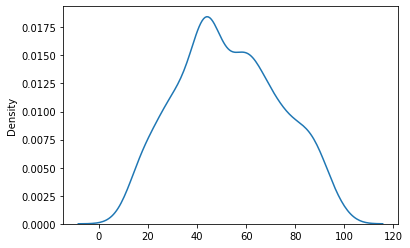

In [104]:
sns.kdeplot(data)

In [98]:
from scipy.stats import shapiro

# normality test
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.962, p=0.000
Sample does not look Gaussian (reject H0)
